<img src="https://miro.medium.com/max/1400/0*J7faRuayovpnHnUp.png"
     alt="https://miro.medium.com/max/1400/0*J7faRuayovpnHnUp.png"
     style="float: left; margin-right: 10px;" />


In [1]:
# imoorting libraries 
#for audio data
import librosa
import librosa.display
import IPython.display as ipd 
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline

In [2]:
sample , sample_rate = librosa.load("audio2.wav" , sr=44100)

In [3]:
print(sample.shape)

(391168,)


In [4]:
ipd.Audio("audio2.wav")

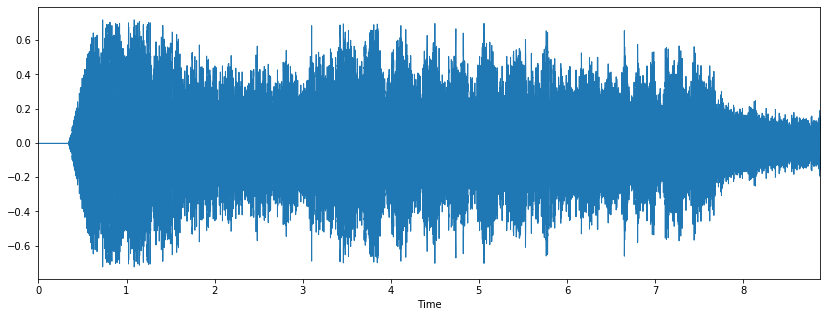

In [5]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(sample, sr=sample_rate)

# Spectrogram

**A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.**

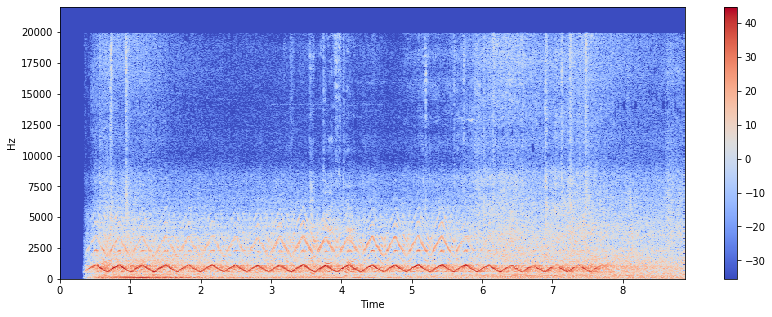

In [6]:
X = librosa.stft(sample)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

In [7]:
import sklearn

# Spectral_centroid

**The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located. 

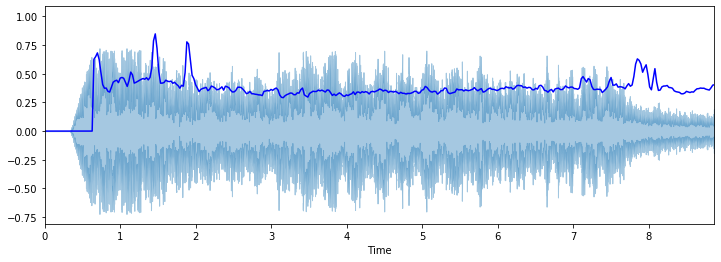

In [8]:
spectral_centroids = librosa.feature.spectral_centroid(sample, sr=sample_rate)[0]
spectral_centroids.shape

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(sample, axis=0):
    return sklearn.preprocessing.minmax_scale(sample, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(sample, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

# spectral_rolloff

**It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0. To obtain it, we have to calculate the fraction of bins in the power spectrum where 85% of its power is at lower frequencies.**

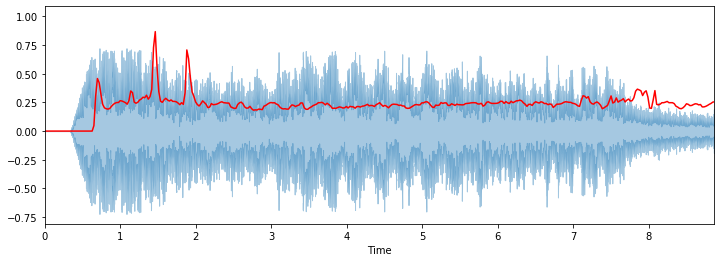

In [10]:
spectral_rolloff = librosa.feature.spectral_rolloff(sample+0.01, sr=sample_rate)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(sample, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')


# spectral_bandwidth

**The spectral bandwidth is defined as the width of the band of light at one-half the peak maximum (or full width at half maximum [FWHM]) and is represented by the two vertical red lines and λSB on the wavelength axis.**

<img src="https://miro.medium.com/max/1030/1*oUtYY0-j6iEc78Dew3d0uA.png"
     alt="https://miro.medium.com/max/1030/1*oUtYY0-j6iEc78Dew3d0uA.png"
     style="float: left; margin-right: 10px;" />

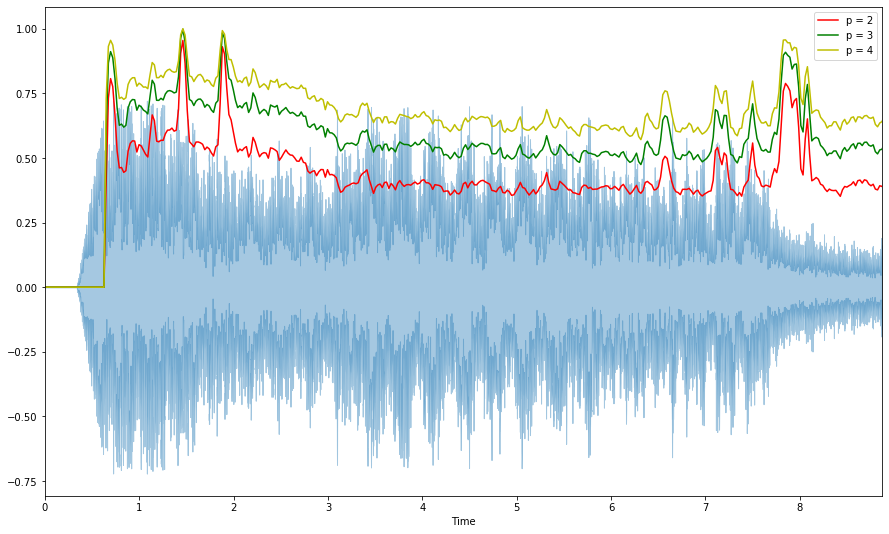

In [11]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(sample+0.01, sr=sample_rate)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(sample+0.01, sr=sample_rate, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(sample+0.01, sr=sample_rate, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(sample, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))


# zero crossinng

**A very simple way for measuring the smoothness of a signal is to calculate the number of zero-crossing within a segment of that signal. **

In [12]:
zero_crossings = librosa.zero_crossings(sample, pad=False)
print(sum(zero_crossings))


19303


# chromagram

**A chroma feature or vector is typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, …, B}, is present in the signal. In short, It provides a robust way to describe a similarity measure between music pieces.**

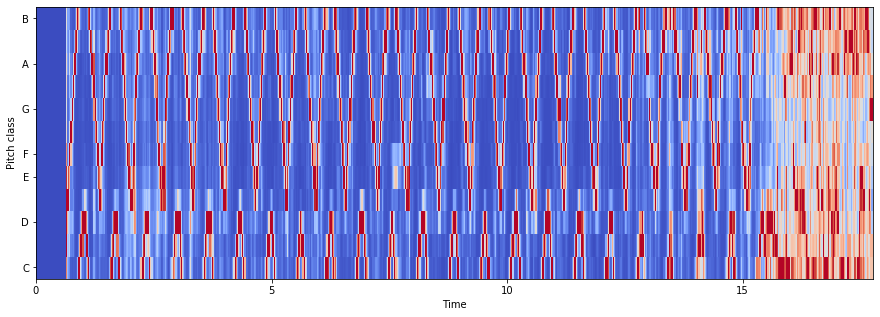

In [13]:
chromagram = librosa.feature.chroma_stft(sample, sr=sample_rate)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')